   
<center>

# OBRADA PRIRODNOG JEZIKA
## 2023./2024.
## Projekt - Lematizacija
#### Marko Bonovil i Marko Burazin

</center>


# **Librarys**

In [1]:
!pip install numpy pandas matplotlib seaborn scikit-learn


[notice] A new release of pip available: 22.3 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import numpy as np
import pandas as pd
from io import open
import os
import re
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

1. [numpy](https://numpy.org/) **(np)**: This library provides support for working with multidimensional arrays or matrices and offers numerous functions for mathematical operations, linear algebra, random number generation, and other numerical operations in Python.

2. [pandas](https://pandas.pydata.org/) **(pd)**: Pandas is a library for data analysis and manipulation. It enables loading, manipulation, and analysis of structured data in the form of DataFrames. Pandas facilitates reading data from various sources such as CSV, Excel, SQL databases, and makes their processing easier.

3. [io](https://docs.python.org/3/library/io.html): This library enables working with input/output operations, including file operations such as working with text files, using various methods for opening, reading, and writing files.

4. [os](https://docs.python.org/3/library/os.html): This library provides functions for interacting with the operating system. It includes operations such as file manipulation, working with directories, and checking the file system.

5. [re](https://docs.python.org/3/library/re.html): Re (Regular Expression) is a library for processing regular expressions in Python. It allows searching and manipulating textual data using specific patterns or regular expressions.

6. [matplotlib.pyplot](https://matplotlib.org/3.5.3/api/_as_gen/matplotlib.pyplot.html) **(plt)**: Matplotlib is a library for data visualization in Python. The Pyplot module provides an interface similar to MATLAB for creating various types of graphs, such as line plots, histograms, scatter plots, and other types of graphs.

7. [seaborn](https://seaborn.pydata.org/) **(sns)**: Seaborn is a data visualization library based on Matplotlib. It provides simple methods for creating attractive and informative statistical graphs.

8. [sklearn.model_selection.train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html): This function comes from the Scikit-learn (sklearn) package, which is a library for machine learning in Python. This function is used to split the dataset into training and testing sets to evaluate the performance of machine learning models.

This command uses the Git version control tool to clone all contents from the repository named "hr500k" from the GitHub platform and places them into a local directory.

In [5]:
!git clone https://github.com/reldi-data/hr500k.git

Cloning into 'hr500k'...


The file hr500k.conllup, which represents the dataset used in this project, is located at the path folder_path initialized by the following command.

In [4]:
folder_path = 'D:\OPJ_Projekt\hr500k/hr500k.conllup' #path to dataset

# **Loading the dataset**

**Fromat:**
>The data used in the project are stored in a file called hr500k with the extension .conllup. Files with this extension are text files that contain data in the [CoNNL-U](https://universaldependencies.org/format.html) format. This format was used to represent annotated linguistic data, especially for marking grammatical tags in textual data.

**hr500k:**
> hr500k represents a set of textual data in the Croatian language that is used in the area
natural language processing (NLP) and machine learning research. The corpus contains different species
texts, including news, blogs, articles, forum posts, reviews and the like.
It consists of the following columns:


>1. **ID** : sentence-local word index
>2. **FORM** : token, i.e. word form or punctuation symbol
>3. **LEMMA** : lemma of word form
>4. **UPOS** : Universal Part of Speech tag.
>5. **XPOS** : Language-specific Part of Speech tag.
>6. **FEATS** : Morphological features.
>7. **HEAD** : ID of the head token in the sentence.
>8. **DEPREL** : dependency relation (head, label) ac-cording to the UDv2 formalism
>9. **DEPS** : Enhanced dependency graph in the CoNLL-U format.
>10. **MISC** : Miscellaneous information.
>11. **RELDI:NE** : Relative identifier for Named Entity relations.
>12. **RELDI:DP** : Relative identifier for Dependency Parsing relations.
>13. **RELDI:SRL** : Relative identifier for Semantic Role Labeling relations.
>14. **PARSEME:MWE** : Multi-Word Expression label from the ParSEME project.
>15. **RELDI:MISC** : Miscellaneous relation identifiers.

# **Dataset analysis and preprocessing**

**First overview of the data**
>After loading the directory from GitHub, it is necessary to organize the data in a way that will
be more suitable for viewing the data structure. The function **read_data()** is defined
in such a way that it receives a path to a file and reads data from that file.
The empty variables sent_id, text, tokens, lemmas, xpos_tags,
upos_tags, feats and iob_tags. These variables represent the columns in the corpus, and are used
only the indicated markings in order to observe the basic structure of the corpus.
After the entire file is read, the data is packed into a dictionary.
At the end, the data of the last sentence that was read is returned, after which the function ends.

In [5]:
def read_data(path):
  with open(path, "r", encoding='utf-8') as f: # Open file specified by the path in read mode with UTF-8 encoding
    # Initializing variables to store data
    sent_id = ''  # Sentence ID
    text = ''  # Sentence text
    tokens = []  # List of tokens
    lemmas = []  # List of token lemmas
    xpos_tags = []  # List of Part-of-Speech tags
    upos_tags = []  # List of Universal Part-of-Speech tags
    feats = []  # List of morphological features
    iob_tags = []  # List of Inside-Outside-Begin tags
    data_id = 0  # Data ID

    # Iterating through lines in the file
    for line in f:
      # Checking if line exists and is not empty
      if line and not line == '\n':
        # Checking if line starts with #
        if line.startswith('#'):
          # Checking if line starts with # sent_id
          if line.startswith('# sent_id'):
            # Checking if list of tokens is not empty
            if tokens:
              # Returning data for the previous sentence
              yield {
                  'sent_id': sent_id,
                  'text': text,
                  'tokens': tokens,
                  'lemmas': lemmas,
                  'upos_tags': upos_tags,
                  'xpos_tags': xpos_tags,
                  'feats': feats,
                  'iob_tags': iob_tags
                  }
              # Resetting lists for the next sentence
              tokens = []
              lemmas = []
              upos_tags = []
              xpos_tags = []
              feats = []
              iob_tags = []
              # Incrementing data ID
              data_id += 1
            # Extracting sent_id from the line and removing whitespace
            sent_id = line.split(' = ')[1].strip()
          # Checking if line starts with # text
          elif line.startswith('# text'):
            # Extracting sentence text from the line and removing whitespace
            text = line.split(' = ')[1].strip()
        # If line does not start with _ (not indicating a token), then process data
        elif not line.startswith('_'):
          # Splitting token data based on tabulator
          splits = line.split('\t')
          # Adding data to respective lists
          tokens.append(splits[1].strip())
          lemmas.append(splits[2].strip())
          upos_tags.append(splits[3].strip())
          xpos_tags.append(splits[4].strip())
          feats.append(splits[5].strip())
          iob_tags.append(splits[9].strip())

    # Returning data for the last sentence
    yield {
        'sent_id': sent_id,
        'text': text,
        'tokens': tokens,
        'lemmas': lemmas,
        'upos_tags': upos_tags,
        'xpos_tags': xpos_tags,
        'feats': feats,
        'iob_tags': iob_tags
        }


We print the first five sentences in the corpus with the corresponding divisions so that it is easier to present the structure of the data

In [6]:
data = read_data(folder_path)  # Reads data from the data specified by folder_path
for i in range(5):  # Loop that executes five times
    d = next(data)  # Retrieves the next element from the data iterator
    print(d)  # Prints the current element

{'sent_id': 'set.hr-s1', 'text': 'Proces privatizacije na Kosovu pod povećalom', 'tokens': ['Proces', 'privatizacije', 'na', 'Kosovu', 'pod', 'povećalom'], 'lemmas': ['proces', 'privatizacija', 'na', 'Kosovo', 'pod', 'povećalo'], 'upos_tags': ['NOUN', 'NOUN', 'ADP', 'PROPN', 'ADP', 'NOUN'], 'xpos_tags': ['Ncmsn', 'Ncfsg', 'Sl', 'Npnsl', 'Si', 'Ncnsi'], 'feats': ['Case=Nom|Gender=Masc|Number=Sing', 'Case=Gen|Gender=Fem|Number=Sing', 'Case=Loc', 'Case=Loc|Gender=Neut|Number=Sing', 'Case=Ins', 'Case=Ins|Gender=Neut|Number=Sing'], 'iob_tags': ['_', '_', '_', 'NamedEntity=Yes', '_', '_']}
{'sent_id': 'set.hr-s2', 'text': 'Kosovo ozbiljno analizira proces privatizacije u svjetlu učestalih pritužbi.', 'tokens': ['Kosovo', 'ozbiljno', 'analizira', 'proces', 'privatizacije', 'u', 'svjetlu', 'učestalih', 'pritužbi', '.'], 'lemmas': ['Kosovo', 'ozbiljno', 'analizirati', 'proces', 'privatizacija', 'u', 'svjetlo', 'učestao', 'pritužba', '.'], 'upos_tags': ['PROPN', 'ADV', 'VERB', 'NOUN', 'NOUN', 'A

In [7]:
data = read_data(folder_path)

In [8]:
X = []  # List to store tokens
for d in data:  # Iterating through each data element
    X.append(d["tokens"])  # Appending tokens of current data element to X

In [9]:
tokens = set([word.lower() for sentence in X for word in sentence]) # Generating a set of unique tokens by converting all words to lowercase in each token sentence in X
num_tokens = len(tokens) # Counting the number of unique tokens

In [10]:
print("Total number of marked sentences: {}".format(len(X)))
print("Dictionary size: {} words".format(num_tokens))

Total number of marked sentences: 24763
Dictionary size: 66724 words


Within the hr500k.conllup corpus, we have a total of 24763 sentences, and the number of tokens from which these sentences are composed
is 66724. The next step is to load the corpus into a DataFrame for easier data analysis and preprocessing.
We will load sentences, tokens and lemmatization labels of individual tokens into the DataFrame.

In [11]:
def load_conllup_file(file_path):
    with open(file_path, 'r', encoding='utf-8') as file:  # Load the file hr500k.conllup and read its content
      lines = file.readlines()

    sentences = []  # Create an empty list for sentences
    current_sentence = {'tokens': [], 'lemmas': []} # Initialize an empty dictionary for the current sentence

    for line in lines:  # Iterate through each line in the file
        line = line.strip()
        if line.startswith('# sent_id'):  # Check if the line marks the beginning of a new sentence or contains text information
            if current_sentence['tokens']:
                sentences.append(current_sentence)  # If the end of the current sentence is found, it is added to the list of sentences
            current_sentence = {'tokens': [], 'lemmas': []} # Initialize a new dictionary for the next sentence
        elif line.startswith('# text'):
            current_sentence['text'] = line.split('=')[1].strip() # Extract text information from the line
        elif line and not line.startswith('#'):
            # Extract 'tokens' and 'lemmas' from the line and add them to the current sentence
            parts = line.split('\t')
            current_sentence['tokens'].append(parts[1])
            current_sentence['lemmas'].append(parts[2])

    # Add the last sentence to the list of sentences
    if current_sentence['tokens']:
        sentences.append(current_sentence)

    return sentences

In [12]:
def create_dataframe(sentences):
    data = {'Sentence': [], 'Tokens': [], 'Lemas': []}  # Create a data dictionary for each sentence

    for sentence in sentences:  # Iterate through each sentence and add data to the dictionary
        data['Sentence'].append(sentence['text'])  # Add the sentence text to the dictionary
        data['Tokens'].append(sentence['tokens'])  # Add the tokens of the sentence to the dictionary
        data['Lemas'].append(sentence['lemmas'])     # Add the lemmas of the sentence to the dictionary
    df = pd.DataFrame(data) # Create a DataFrame from the data dictionary
    return df

In [13]:
sentences = load_conllup_file(folder_path)  #Uploading a file

In [14]:
df = create_dataframe(sentences)  # Creating a DataFrame
print(df.head())

                                            Sentence  \
0       Proces privatizacije na Kosovu pod povećalom   
1  Kosovo ozbiljno analizira proces privatizacije...   
2  Feronikel je privatiziran prije pet godina i j...   
3        Barem na papiru, izgleda kao odlična ideja.   
4  Vlada prodaje poduzeća, rješava se opterećenja...   

                                              Tokens  \
0  [Proces, privatizacije, na, Kosovu, pod, poveć...   
1  [Kosovo, ozbiljno, analizira, proces, privatiz...   
2  [Feronikel, je, privatiziran, prije, pet, godi...   
3  [Barem, na, papiru, ,, izgleda, kao, odlična, ...   
4  [Vlada, prodaje, poduzeća, ,, rješava, se, opt...   

                                               Lemas  
0  [proces, privatizacija, na, Kosovo, pod, poveć...  
1  [Kosovo, ozbiljno, analizirati, proces, privat...  
2  [Feronikel, biti, privatizirati, prije, pet, g...  
3  [barem, na, papir, ,, izgledati, kao, odličan,...  
4  [Vlada, prodavati, poduzeće, ,, rješavati, seb..

In [15]:
df

,Sentence,Tokens,Lemas
0,Proces privatizacije na Kosovu pod povećalom,"[Proces, privatizacije, na, Kosovu, pod, poveć...","[proces, privatizacija, na, Kosovo, pod, poveć..."
1,Kosovo ozbiljno analizira proces privatizacije...,"[Kosovo, ozbiljno, analizira, proces, privatiz...","[Kosovo, ozbiljno, analizirati, proces, privat..."
2,Feronikel je privatiziran prije pet godina i j...,"[Feronikel, je, privatiziran, prije, pet, godi...","[Feronikel, biti, privatizirati, prije, pet, g..."
3,"Barem na papiru, izgleda kao odlična ideja.","[Barem, na, papiru, ,, izgleda, kao, odlična, ...","[barem, na, papir, ,, izgledati, kao, odličan,..."
4,"Vlada prodaje poduzeća, rješava se opterećenja...","[Vlada, prodaje, poduzeća, ,, rješava, se, opt...","[Vlada, prodavati, poduzeće, ,, rješavati, seb..."
...,...,...,...
24758,Estetska ograničenja nadoknađuju i izvrsna gla...,"[Estetska, ograničenja, nadoknađuju, i, izvrsn...","[estetski, ograničenje, nadoknađivati, i, izvr..."
24759,Undertale je igra koja savršeno poznaje svoju ...,"[Undertale, je, igra, koja, savršeno, poznaje,...","[Undertale, biti, igra, koji, savršeno, poznav..."
24760,Teško je bez velikog spojlanja objasniti kolik...,"[Teško, je, bez, velikog, spojlanja, objasniti...","[teško, biti, bez, velik, spojlanje, objasniti..."
24761,Ona jednostavno priča svoju priču na način koj...,"[Ona, jednostavno, priča, svoju, priču, na, na...","[on, jednostavno, pričati, svoj, priča, na, na..."


In [16]:
df['Sentence'][3]

'Barem na papiru, izgleda kao odlična ideja.'

In [17]:
df['Tokens'][3]

['Barem', 'na', 'papiru', ',', 'izgleda', 'kao', 'odlična', 'ideja', '.']

In [18]:
df['Lemas'][3]

['barem', 'na', 'papir', ',', 'izgledati', 'kao', 'odličan', 'ideja', '.']

It can be seen that the 'Tokens' and 'Lemas' columns contain punctuation marks such as { '.'  ',' } and similar
therefore, in data preprocessing we will remove punctuation marks and reshape letters
so that all letters in the corpus are lowercase.

In [19]:
def preprocess_text(text_list):
    processed_texts = []  # List for processed texts
    for text in text_list:
        processed_text = []  # List for processed text
        inside_quotes = False  # To track if we are inside quotes
        for element in text:
            if "'" in element:
                inside_quotes = not inside_quotes  # Handling inside quotes
            # Replace marked words (words enclosed in apostrophes) with empty space
            element = re.sub(r"'[^.,!?']*'", ' ', element)
            # Convert uppercase letters to lowercase
            element = element.lower()
            # Remove all characters that are not letters, numbers, or spaces, but keep diacritics
            element = re.sub(r"[^a-zA-Z0-9 ČčĆćDždžĐđŠšŽž]+", '', element)
            if element.strip():
                processed_text.append(element)  # Adding processed text to the list
        processed_texts.append(processed_text)  # Adding processed text to the list of processed texts
    return processed_texts

**preprocess_text()** :
> The preprocess_text() function has the role of processing the input text to prepare it for further processing and analysis.

> Characters retained in the text:
> 1. Letters: (A-Z)
> 2. Numbers: decimal numbers (0-9)
> 3. Letters characteristic of the Croatian speaking area: ('Č' , 'Ć' , 'DŽ' , 'Đ' 'Ž' 'Š')

> Characters that have been removed from the text:
> 1. Punctuation marks: All punctuation marks such as periods, commas, exclamation points, question marks and the like.
> 2. Special characters: All characters that are not letters, numbers, or spaces.
> 3. Other characters: Characters that are not standard ASCII characters.

In [20]:
text_columns = ['Tokens','Lemas']

for column in text_columns: # Iterating through the 'Tokens' and 'Lemas' columns within the data frame
    df[column] = preprocess_text(df[column])  # Processing texts in the selected columns using the previously defined function

In [21]:
df.head(5)

,Sentence,Tokens,Lemas
0,Proces privatizacije na Kosovu pod povećalom,"[proces, privatizacije, na, kosovu, pod, poveć...","[proces, privatizacija, na, kosovo, pod, poveć..."
1,Kosovo ozbiljno analizira proces privatizacije...,"[kosovo, ozbiljno, analizira, proces, privatiz...","[kosovo, ozbiljno, analizirati, proces, privat..."
2,Feronikel je privatiziran prije pet godina i j...,"[feronikel, je, privatiziran, prije, pet, godi...","[feronikel, biti, privatizirati, prije, pet, g..."
3,"Barem na papiru, izgleda kao odlična ideja.","[barem, na, papiru, izgleda, kao, odlična, ideja]","[barem, na, papir, izgledati, kao, odličan, id..."
4,"Vlada prodaje poduzeća, rješava se opterećenja...","[vlada, prodaje, poduzeća, rješava, se, optere...","[vlada, prodavati, poduzeće, rješavati, sebe, ..."


In [22]:
df['Sentence'][3]

'Barem na papiru, izgleda kao odlična ideja.'

In [23]:
df['Tokens'][3]

['barem', 'na', 'papiru', 'izgleda', 'kao', 'odlična', 'ideja']

In [24]:
df['Lemas'][3]

['barem', 'na', 'papir', 'izgledati', 'kao', 'odličan', 'ideja']

The preprocess_text() function has removed all unnecessary characters so we can continue with
further processing of the corpus.

# Data verification

In [25]:
list_tokens=[]  # Creating an empty list for words
list_lemmas=[]    # Creating an empty list for lemmas
x=df['Tokens'].count()  # Counting the total number of tokens in the 'Tokens' column within the dataframe

Checking the number of tokens and the number of lemmas in the corpus

In [26]:
num=-1

In [27]:
for i in range(x):

  num+=1  # Incrementing the sentence index number
  n_tokens=0  # Initializing the counter for tokens in a sentence
  nn_tokens=0  # Storing the count of tokens in a sentence
  n_lemas=0   # Initializing the counter for lemmas in a sentence
  nn_lemas=0  # Storing the count of lemmas in a sentence

  for element in df['Tokens'][i]:
    n_tokens+=1  # Counting the tokens in the 'Tokens' column for the current sentence
  nn_tokens=n_tokens  # Storing the count of tokens

  for element in df['Lemas'][i]:
    n_lemas+=1  # Counting the lemmas in the 'Lemas' column for the current sentence
  nn_lemas=n_lemas  # Storing the count of lemmas

  if(nn_tokens!=nn_lemas):  # Checking if the counts of tokens and lemmas don't match
    print(f"The number of words in the Tokens column and the Lemas column do not match for the index sentence: {num}")  # Printing a message indicating the mismatch
    continue  # Skipping to the next iteration if there is a mismatch

The number of words in the Tokens column and the Lemas column do not match for the index sentence: 4427


The token and lemma record in the dataset for the sentence with index 4427 do not match

In [28]:
df['Sentence'][4427]

'Nedavno je ponuđena nagrada od $ 3,000 kreatoru drivera otvorenog koda za Xbox 360 Kinect, kontroler osjetljiv na pokrete.'

In [29]:
df['Tokens'][4427]

['nedavno',
 'je',
 'ponuđena',
 'nagrada',
 'od',
 '3000',
 'kreatoru',
 'drivera',
 'otvorenog',
 'koda',
 'za',
 'xbox',
 '360',
 'kinect',
 'kontroler',
 'osjetljiv',
 'na',
 'pokrete']

In [30]:
df['Lemas'][4427]

['nedavno',
 'biti',
 'ponuditi',
 'nagrada',
 'od',
 'sto',
 '3000',
 'kreator',
 'driver',
 'otvoren',
 'kod',
 'za',
 'xbox',
 '360',
 'kinect',
 'kontroler',
 'osjetljiv',
 'na',
 'pokret']

Excluding the word 'sto' that does not match

In [31]:
for i in range(x):
  for element in df['Tokens'][i]: # Iterating through each sentence within the data frame
    list_tokens.append(element)  # Adding each word to the list of words

  if i==4427: # Checking the index of the sentence
    for element in df['Lemas'][i]:  # For a specific index of the sentence, add only the lemmas that are not 'sto' to the list of lemmas
      if element != 'sto':
        list_lemmas.append(element)

  if i!=4427: # Checking the index of the sentence
    for element in df['Lemas'][i]:  # For all other indices of the sentences, add all lemmas to the list of lemmas
      list_lemmas.append(element)

In [32]:
print(len(list_lemmas))
print(len(list_tokens))

438434
438434


The next step will be to create a DataFrame from the corpus with 'Token' and 'Lemma' columns.
The dataset created will be used on machine learning models to determine
lemmatization marks

In [33]:
dataset = pd.DataFrame({
    'Rijeci': list_tokens,
    'Leme': list_lemmas
})

In [34]:
dataset

,Rijeci,Leme
0,proces,proces
1,privatizacije,privatizacija
2,na,na
3,kosovu,kosovo
4,pod,pod
...,...,...
438429,koje,koji
438430,nećemo,htjeti
438431,tako,tako
438432,skoro,skoro


# Descriptive statistics

Analyzing textual data often requires the use of
specialized tools and techniques to gain useful insights.
We focus on the application of descriptive statistics to the data set
consisting of tokens and lemmatizations.
Through descriptive statistics, we aim to provide detailed insight into
the structure of this dataset,
 explore the basic characteristics of tokens and their lemmatized ones
shape and extract useful information that can serve as a basis for further analysis
or interpretation of results.

Number of unique words in the corpus: 66075
Number of unique lemmas in the corpus: 32590


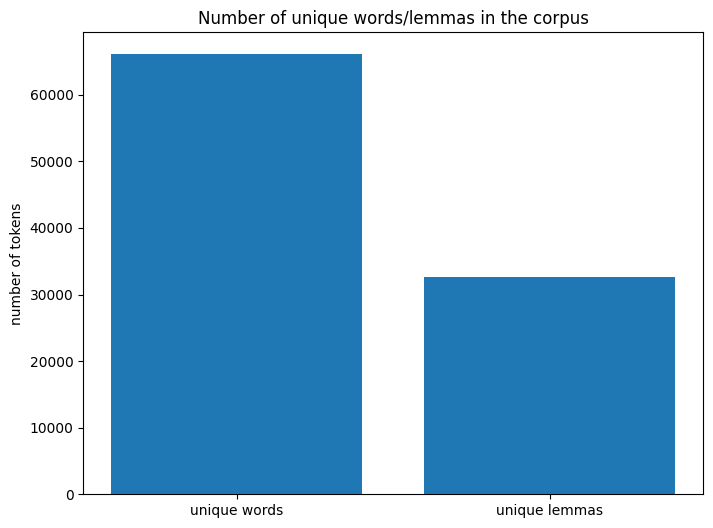

In [35]:
unique_words = len(set(dataset['Rijeci'].explode())) # Calculate the number of unique words by computing the length of the set of unique tokens from the 'Token' column in the dataset.
unique_lemmas = len(set(dataset['Leme'].explode()))  # Calculate the number of unique lemmas by computing the length of the set of unique lemmas from the 'Lemma' column in the dataset.


print(f"Number of unique words in the corpus: {unique_words}")  # Print the number of unique words and the number of unique words in the corpus.
print(f"Number of unique lemmas in the corpus: {unique_lemmas}")  # Print the number of unique words and the number of unique lemmas in the corpus.


plt.figure(figsize=(8, 6))  # Create a new figure with size 8x6.
plt.bar(['unique words','unique lemmas'], [unique_words,unique_lemmas]) # Display bar charts for the number of unique words and the number of unique lemmas on the plot.
plt.ylabel('number of tokens')  # Label the y-axis as 'number of tokens'.
plt.title('Number of unique words/lemmas in the corpus')  # Set the title of the plot to 'Number of unique words/lemmas in the corpus'.
plt.show()  # Show the plot.

The graph shows that there are over 60,000 unique words, while the number of unique lemmas is much smaller and amounts to around 30,000. This difference indicates that a large number of different forms of the same words (lemma) appear in the corpus.

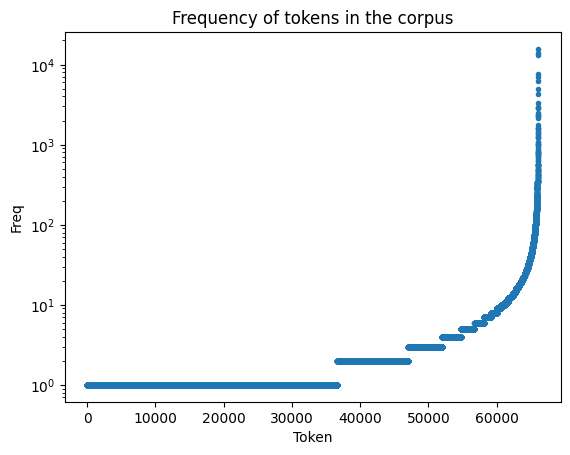

In [36]:
freqs = sorted(dataset['Rijeci'].value_counts()) # Compute the frequency of each token appearing in the dataset and sort them.

plt.scatter(range(len(freqs)), freqs, marker=".") # Plot the distribution of token frequencies using a scatter plot.
plt.title("Frequency of tokens in the corpus")  # Set the title of the plot to "Frequency of tokens in the corpus".
plt.ylabel("Freq")  # Label the y-axis as "Freq" (frequency).
plt.xlabel("Token") # Label the x-axis as "Token".
plt.yscale("log") # Set the y-axis scale to logarithmic for better visualization of the data.
plt.show()  # Display the plot.

The graph shows the frequency of tokens in the corpus. On the x-axis are the tokens, and on the y-axis is the frequency, displayed in a logarithmic scale. It can be seen that a small number of tokens have a high frequency (over 10^3), while most tokens have a low frequency (below 10^2). This indicates that the corpus contains a large number of rare words and few frequently used words, which is typical for natural languages.

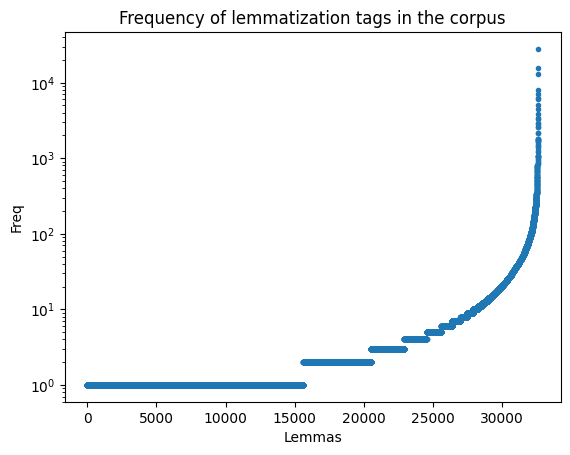

In [37]:
freqs = sorted(dataset['Leme'].value_counts())  # Compute the frequency of each lemma appearing in the dataset and sort them.

plt.scatter(range(len(freqs)), freqs, marker=".") # Plot the distribution of lemma frequencies using a scatter plot.
plt.title("Frequency of lemmatization tags in the corpus")  # Set the title of the plot to "Frequency of lemmatization tags in the corpus".
plt.ylabel("Freq")  # Label the y-axis as "Freq" (frequency).
plt.xlabel("Lemmas")  # Label the x-axis as "Lemmas".
plt.yscale("log") # Set the y-axis scale to logarithmic for better visualization of the data.
plt.show()  # Display the plot.

The graph shows the frequency of lemma in the data set.
It can be seen that most of the leads have a low frequency, but there is a small number
lemma with high frequency. This distribution indicates that in the set
data, a large number of rare lemmas appear, while some lemmas are often used.

In [38]:
no_token = dataset['Rijeci'].explode().value_counts()  # Count the occurrences of each token in the dataset after exploding the 'Token' column.
no_lemma = dataset['Leme'].explode().value_counts()  # Count the occurrences of each lemma in the dataset after exploding the 'Lemma' column.

# Filter out the tokens and lemmas that appear only once.
freq_1_w = no_token[no_token == 1]
freq_1_l = no_lemma[no_lemma == 1]
# Count the number of tokens and lemmas that appear only once.
br_freq_1_w = len(freq_1_w)
br_freq_1_l = len(freq_1_l)
# Calculate the percentage of tokens and lemmas that appear only once relative to the total number of unique tokens and lemmas.
postotak_w = (br_freq_1_w / unique_words) * 100
postotak_l = (br_freq_1_l / unique_lemmas) * 100

print("Total number of tokens that appear only once: ", br_freq_1_w)
print("In relation to the total number of unique tokens it amounts to: {:.2f}%".format(postotak_w))
print("Total number of lemmas that appear only once: ", br_freq_1_l)
print("In relation to the total number of lemmas, it amounts to: {:.2f}%".format(postotak_l))

Total number of tokens that appear only once:  36669
In relation to the total number of unique tokens it amounts to: 55.50%
Total number of lemmas that appear only once:  15629
In relation to the total number of lemmas, it amounts to: 47.96%


In [39]:
longest_token = max(dataset['Rijeci'], key=len)  # Find the longest token in the dataset by length.
longest_len = len(longest_token)  # Calculate the length of the longest token.
shortest_token = min(dataset['Rijeci'], key=len) # Find the shortest token in the dataset by length.
shortest_len = len(shortest_token)  # Calculate the length of the shortest token.


longest_lemma = max(dataset['Leme'], key=len)  # Find the longest lemma in the dataset by length.
longest_l_len = len(longest_lemma)  # Calculate the length of the longest lemma.
shortest_lema = min(dataset['Leme'], key=len)  # Find the shortest lemma in the dataset by length.
shortest_l_len = len(shortest_lema) # Calculate the length of the shortest lemma.

# Initialize variables
total_length = 0
number_words = 0

for word in dataset['Rijeci']: # Iterate through each token in the dataset.
    total_length += len(word) # Add the length of the current token to the total length.
    number_words += 1 # Increment the number of words.

average_length_token = total_length / number_words  # Calculate the average length of tokens.

# Initialize variables
total_length_l = 0
lemma_number = 0

for lemma in dataset['Leme']:  # Iterate through each lemma in the dataset.
    total_length_l += len(lemma)  # Add the length of the current lemma to the total length.
    lemma_number += 1 # Increment the number of lemmas.

average_length_of_lemma = total_length_l / lemma_number # Calculate the average length of lemmas.

In [40]:
print("TOKEN:")
print("-------------------------------------------------------------------------")
print("The longest token is:", longest_token)
print("Its length is:", longest_len)

print("The shortest token is:", shortest_token)
print("Its length is:", shortest_len)
print("Average length of tokens in the corpus: {:.2f}".format(average_length_token))
print("-------------------------------------------------------------------------")
print("LEMMA:")
print("-------------------------------------------------------------------------")
print("The longest lemma is:", longest_lemma)
print("Its length is:", longest_l_len)

print("The shortest lemma is:", shortest_lema)
print("Its length is:", shortest_l_len)
print("Average length of lemma in the corpus: {:.2f}".format(average_length_of_lemma))

TOKEN:
-------------------------------------------------------------------------
The longest token is: imghttpwwwugcscaltechedusttngpicsfedlogogifimg
Its length is: 46
The shortest token is: u
Its length is: 1
Average length of tokens in the corpus: 5.25
-------------------------------------------------------------------------
LEMMA:
-------------------------------------------------------------------------
The longest lemma is: imghttpwwwugcscaltechedusttngpicsfedlogogifimg
Its length is: 46
The shortest lemma is: u
Its length is: 1
Average length of lemma in the corpus: 5.26


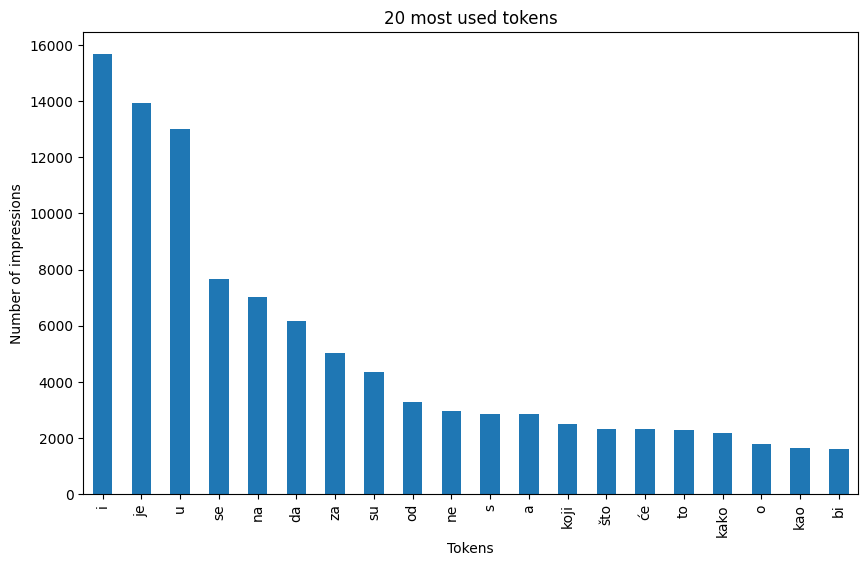

In [41]:
token_counts = dataset['Rijeci'].value_counts().head(20) # Count the occurrences of each token in the dataset and select the top 20 most frequent tokens.

plt.figure(figsize=(10, 6)) # Create a new figure with size 10x6
token_counts.plot(kind='bar') # Plot a bar chart representing the top 20 most used tokens
plt.title('20 most used tokens')  # Set the title of the plot to '20 most used tokens'.
plt.xlabel('Tokens')  # Label the x-axis as 'Tokens'.
plt.ylabel('Number of impressions') # Label the y-axis as 'Number of impressions'.
plt.xticks(rotation=90) # Rotate the x-axis labels by 90 degrees for better readability.
plt.show()  # Display the plot.

The graph shows the 20 most frequently used tokens. The x-axis is the tokens and the y-axis is the number of occurrences. The most common token is "i" with over 14,000 occurrences, followed by "je","u", etc.

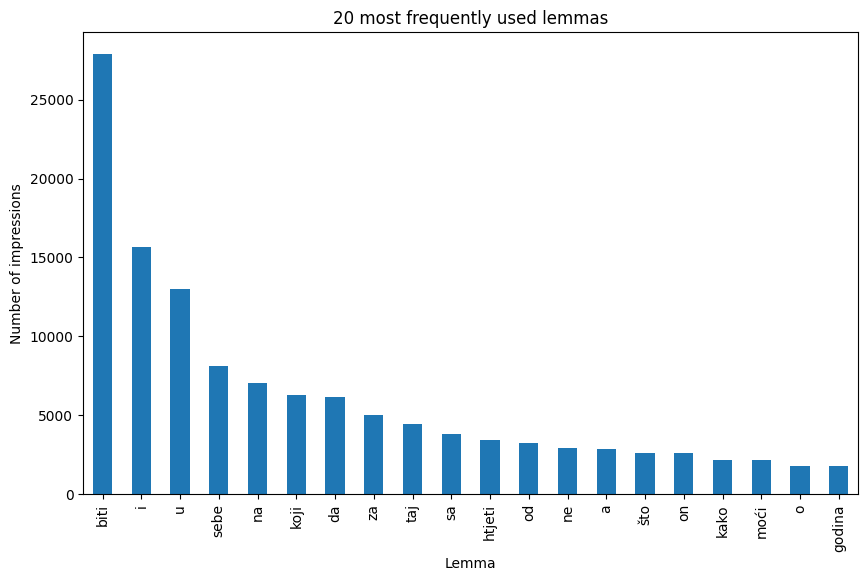

In [42]:
lemma_counts = dataset['Leme'].value_counts().head(20) # Count the occurrences of each lemma in the dataset and select the top 20 most frequent lemmas.

plt.figure(figsize=(10, 6)) # Create a new figure with size 10x6.
lemma_counts.plot(kind='bar') # Plot a bar chart representing the top 20 most frequently used lemmas.
plt.title('20 most frequently used lemmas') # Set the title of the plot to '20 most frequently used lemmas'.
plt.xlabel('Lemma') # Label the x-axis as 'Lemma'.
plt.ylabel('Number of impressions') # Label the y-axis as 'Number of impressions'.
plt.xticks(rotation=90) # Rotate the x-axis labels by 90 degrees for better readability.
plt.show()  # Display the plot.

The graph shows the 20 most frequently used lemmas. The x-axis is the lemmas and the y-axis is the number of occurrences. The most common lemma is "biti" with over 14,000 occurrences, followed by "i","u", etc.

In [43]:
lema_counter = dataset['Leme'].value_counts().head(10).index.tolist() # Count the occurrences of each lemma in the dataset and select the top 10 most frequent lemmas.
                                                                      # Then, retrieve the indices (lemmas) of these top 10 most frequent occurrences.
lema_counter  # Return the list of top 10 most frequent lemmas.

['biti', 'i', 'u', 'sebe', 'na', 'koji', 'da', 'za', 'taj', 'sa']

In [44]:
for element in lema_counter:    # Iterate through each lemma in the list of top 10 most frequent lemmas.
    filtered_data = dataset[dataset['Leme'] == element] # Filter the dataset to include only rows where the lemma matches the current element.
    word_counts = filtered_data['Rijeci'].value_counts()  # Count the occurrences of each token for the current lemma.
    print("---------------------")
    print(element)  # Print the current lemma.
    print("---------------------")
    print(word_counts.head(5))  # Print the top 5 most common tokens associated with the current lemma.

---------------------
biti
---------------------
Rijeci
je      13786
su       4340
bi       1606
nije     1257
sam      1205
Name: count, dtype: int64
---------------------
i
---------------------
Rijeci
i      15674
me         4
iii        1
Name: count, dtype: int64
---------------------
u
---------------------
Rijeci
u    13014
Name: count, dtype: int64
---------------------
sebe
---------------------
Rijeci
se       7662
sebe      170
si        127
sebi      101
sobom      36
Name: count, dtype: int64
---------------------
na
---------------------
Rijeci
na    7031
Name: count, dtype: int64
---------------------
koji
---------------------
Rijeci
koji      2510
koje      1239
koja       941
koju       344
kojima     276
Name: count, dtype: int64
---------------------
da
---------------------
Rijeci
da    6136
Name: count, dtype: int64
---------------------
za
---------------------
Rijeci
za    5019
Name: count, dtype: int64
---------------------
taj
---------------------
Rijeci
to 

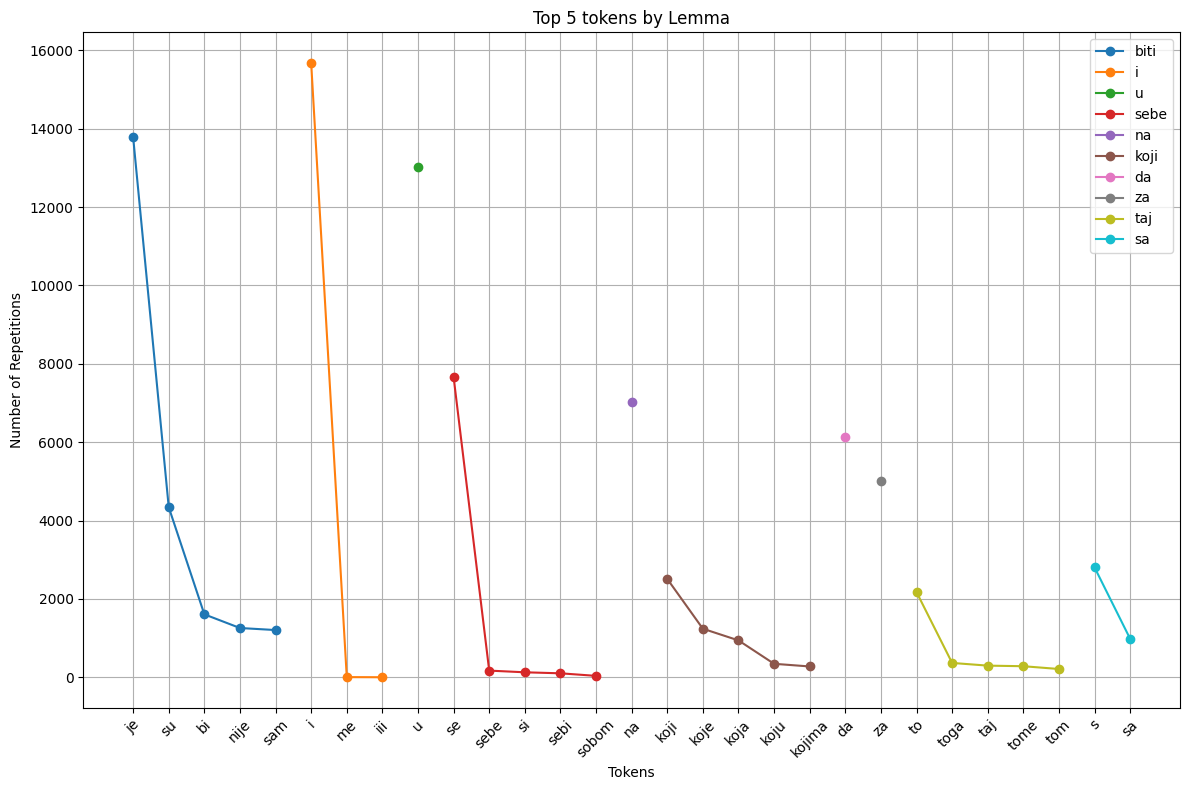

In [45]:
plt.figure(figsize=(12, 8)) # Initialize the figure with size 12x8.
for element in lema_counter:  # Iterate through each element (lemma) in the list of top 10 most frequent lemmas.
    x = dataset[dataset['Leme'] == element]['Rijeci'].value_counts().head(5)  # Filter the dataset to include only rows where the lemma matches the current element,
                                                                              # and then count the occurrences of each token for that lemma, considering only the top 5.
    plt.plot(x, marker='o', label=element)  # Visualize the data by plotting a line chart with markers for each token's occurrence count,
                                            # labeling each line with the current lemma.

plt.title('Top 5 tokens by Lemma')  # Add title to the plot.
plt.xlabel('Tokens')  # Label the x-axis as 'Tokens'.
plt.ylabel('Number of Repetitions') # Label the y-axis as 'Number of Repetitions'.
plt.legend()  # Add a legend to the plot to distinguish between different lemmas.
plt.grid(True)  # Add a grid to the plot for better readability.
plt.xticks(rotation=45) # Rotate the x-axis labels by 45 degrees for better readability.
plt.tight_layout()  # Adjust layout for better visualization.
plt.show()  # Display the plot.

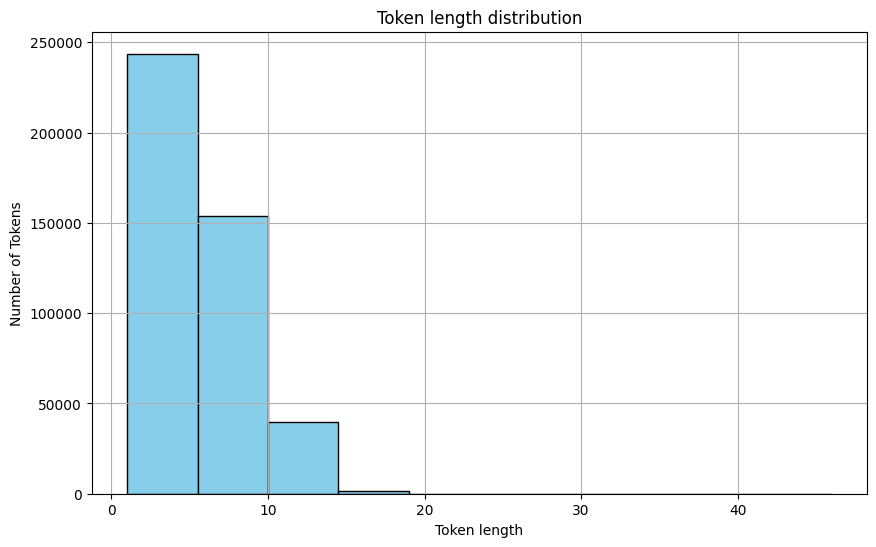

In [46]:
token_length = dataset['Rijeci'].apply(len)  # Compute the length of each token in the dataset and store the lengths in a new Series.

plt.figure(figsize=(10, 6)) # Create a new figure with size 10x6.
plt.hist(token_length, color='skyblue', edgecolor='black')  # Plot a histogram showing the distribution of token lengths.
plt.title('Token length distribution')  # Set the title of the plot to 'Token length distribution'.
plt.xlabel('Token length')  # Label the x-axis as 'Token length'.
plt.ylabel('Number of Tokens')  # Label the y-axis as 'Number of Tokens'.
plt.grid(True)  # Add a grid to the plot for better readability.
plt.show()  # Display the plot.

The chart shows the token length distribution. The largest number of tokens have a length of 0 to 10, with the highest number around 0 to 5. The number of tokens decreases as token length increases, with a significant drop after a length of 10. This distribution indicates that there are a large number of short tokens in the corpus, while the number of long tokens is significantly smaller.

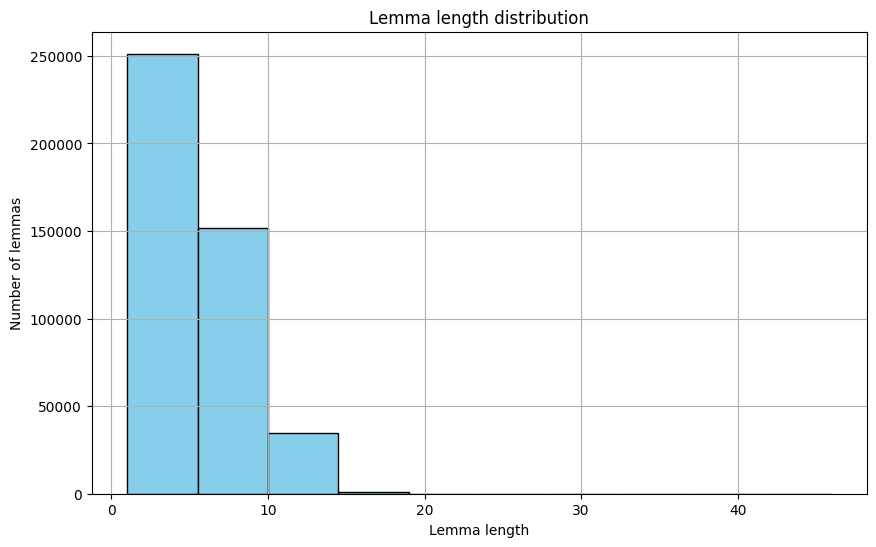

In [47]:
lemma_length = dataset['Leme'].apply(len)  # Compute the length of each lemma in the dataset and store the lengths in a new Series.

plt.figure(figsize=(10, 6)) # Create a new figure with size 10x6.
plt.hist(lemma_length, color='skyblue', edgecolor='black')  # Plot a histogram showing the distribution of lemma lengths.
plt.title('Lemma length distribution')  # Set the title of the plot to 'Lemma length distribution'.
plt.xlabel('Lemma length')  # Label the x-axis as 'Lemma length'.
plt.ylabel('Number of lemmas')  # Label the y-axis as 'Lemma counts'.
plt.grid(True)  # Add a grid to the plot for better readability.
plt.show()  # Display the plot.

The length distribution for lemmatization labels is similar to that for tokens.

# Train, test and validation data splitting

The data is divided into a training set, a validation set, and a training set
in such a way as to take into account the data in relation to the frequency of their lemmas. Used
are only tokens and lemmas where the lemma frequency is greater than 1 so it is avoided
that certain lemmatization labels appear only in the training set or
in one of the remaining two data sets

In [48]:
freq_lemma = dataset['Leme'].value_counts()  # Count the occurrences of each lemma in the dataset and store the frequencies in a Series.
freq_lemma = freq_lemma[freq_lemma > 1] # Filter the lemma frequencies to include only those lemmas that appear more than once.

train_dataset, remaining_data = train_test_split(dataset[dataset['Leme'].isin(freq_lemma.index)],
                                                 test_size=0.25, random_state=42) # Split the dataset into a training set and remaining data using lemmas from the filtered lemma frequencies.
                                                                                  # The training set will contain 75% of the data, and the remaining data will contain 25%.

test_dataset, val_dataset = train_test_split(remaining_data, test_size=0.5, random_state=42)  # Split the remaining data into a test set and a validation set, each containing 12.5% of the original data.

In [49]:
print("The training data set from the total data set includes {:.2f}%".format((len(train_dataset)/len(dataset))*100))
print("The test data set from the total data set includes {:.2f}%".format((len(test_dataset)/len(dataset))*100))
print("The validation data set from the total data set includes {:.2f}%".format((len(val_dataset)/len(dataset))*100))
print("Tokens and lemmatization labels that are excluded due to lemmatization frequency {:.2f}%".format((len(freq_lemma)/len(dataset))*100))

The training data set from the total data set includes 72.33%
The test data set from the total data set includes 12.05%
The validation data set from the total data set includes 12.05%
Tokens and lemmatization labels that are excluded due to lemmatization frequency 3.87%


In [50]:
train_dataset

,Rijeci,Leme
65020,poruku,poruka
259006,a,a
274139,ali,ali
44119,države,država
345827,ipak,ipak
...,...,...
268929,zdravi,zdrav
379587,još,još
135564,slučajno,slučajno
151477,mi,ja


In [51]:
test_dataset

,Rijeci,Leme
23306,povezane,povezati
396041,bolje,dobro
49682,preko,preko
246823,crijeva,crijevo
428560,vremena,vrijeme
...,...,...
76674,su,biti
312403,šećera,šećer
379931,lagani,lagan
194427,o,o


In [52]:
val_dataset

,Rijeci,Leme
378084,producent,producent
240173,modernih,moderan
127401,će,htjeti
182087,dužnosti,dužnost
144786,završiti,završiti
...,...,...
425007,spustio,spustiti
21009,lista,lista
423598,zakona,zakon
35365,za,za


In [56]:
train_dataset.to_csv('train_dataset.csv', index=False)
test_dataset.to_csv('test_dataset.csv', index=False)
val_dataset.to_csv('val_dataset.csv', index=False)